In [1]:
#Needed in general


import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5
import gc

#Quick fudge to make import from ../Scripts work
sys.path.append('../Scripts')


# import script that has formation channel classification functions:
from PostProcessingScripts import * 


from astropy import units as u
from astropy import constants as const

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


import astropy
import seaborn as sns
# from seaborn_utility import cmap_from_colour

<KeysViewHDF5 ['RLOF', 'commonEnvelopes', 'doubleCompactObjects', 'formationChannels', 'supernovae', 'systems', 'weights_detected', 'weights_detectedPerRedshift', 'weights_intrinsic', 'weights_intrinsicPerRedshift']>
this might take a little while, particularly if you are using the BBH
8371398 8371398 8371398
0  still had negative spin; we set these to 0 


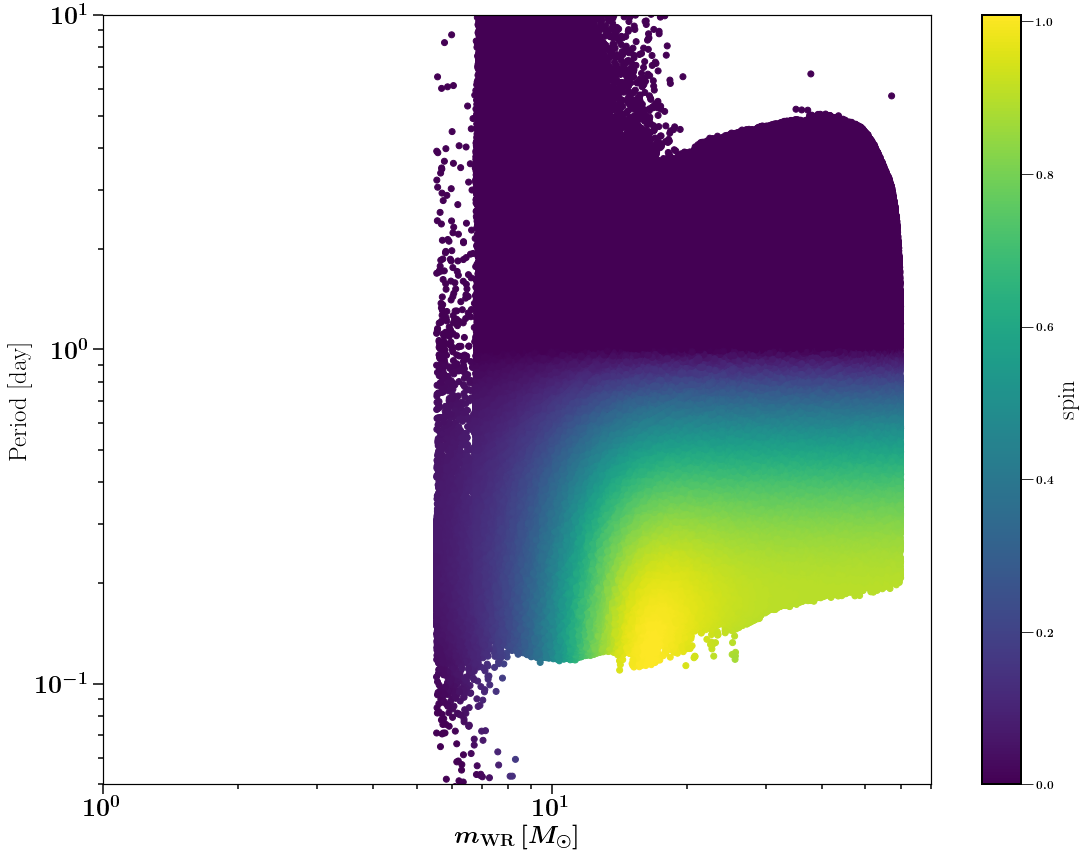

In [2]:
# to obtain properties of ALL binaries simulated, do this:

DCOtype = 'BBH'   # You can change this line to 'BBH', 'BHNS' 'BNS', or 'ALL' (All DCOs)  # change this line! 



# add path to where the COMPASOutput.h5 file is stored. 
# For you the part '/Volumes/Andromeda/DATA/AllDCO_bugfix/fiducial/' is probably different
path = '/Volumes/Andromeda/DATA/AllDCO_bugfix/fiducial/COMPASCompactOutput_'+ DCOtype +'_A.h5' # change this line! 



fdata = h5.File(path)
# shows the different files within the hdf5 folder 
print(fdata.keys())



print('this might take a little while, particularly if you are using the BBH')

# # This code below gets the COMPAS data and only the systems that are DCOs 
# Data            = COMPASData(path=path, lazyData=True, Mlower=5., \
#                  Mupper=150., binaryFraction=1)
# Data.setCOMPASDCOmask(types=DCOtype,  withinHubbleTime=True, optimistic=False)
# Data.setCOMPASData()
# SeedsHubble    = Data.seeds[Data.Hubble==True]



spin = COspin(data_path=path, state='he_depletion')  # set class 
spin.setCOMPASData() # reads in the COMPAS DCO parameters 
spinM1, spinM2  = spin.BaveraSpin()

fdata.close()






f, ax= plt.subplots(ncols=1,nrows=1, figsize=(16,12))

plt.scatter(spin.mWR[0:], spin.PeriodPreSN2[0:],  c=spinM2[0:])




ylabel=r'Period [day]'
xlabel=r'$m_{\rm{WR}} \, [M_{\odot}]$ '

plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 70)
plt.ylim(0.05, 10)

cbar = plt.colorbar()
cbar.set_label('spin', fontsize=fs)
cbar.ax.tick_params(labelsize='large')


layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel,setMinor=False)
f.tight_layout() 
plt.savefig('./BHBH_COMPAS_model_A.png', dpi=600)#,\
plt.show()

In [3]:
fdata.close()